/tmp/ipykernel_56289/3800221081.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


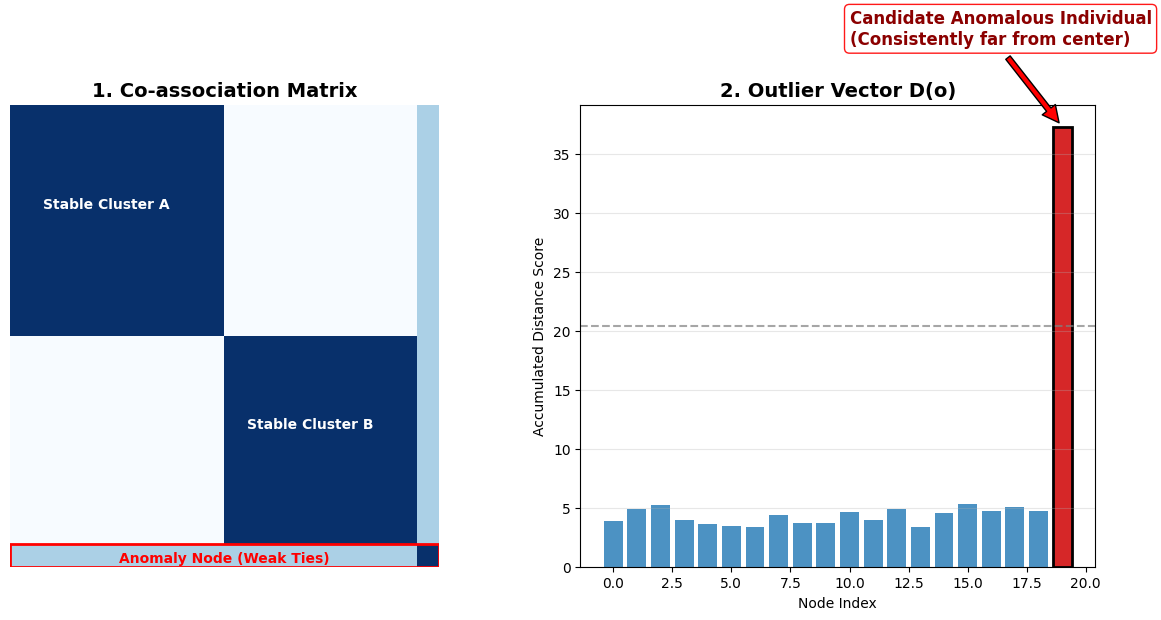

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

def plot_eac_dual_mechanism():
    # --- 1. 模擬數據生成 ---
    np.random.seed(42)
    n_samples = 20
    n_runs = 12
    
    # 定義節點角色
    # 0-9: Stable Cluster A
    # 10-18: Stable Cluster B
    # 19: Anomaly (The Lone Wolf)
    
    # 初始化矩陣與向量
    co_assoc_matrix = np.zeros((n_samples, n_samples))
    outlier_vector = np.zeros(n_samples)
    
    # 模擬 12 次分群實驗
    for run in range(n_runs):
        # 模擬分群結果 (Cluster Labels)
        # 正常情況下 A 是一群, B 是一群
        # 但偶爾會有 1-2 個點跑錯 (模擬隨機性)
        labels = np.zeros(n_samples)
        labels[0:10] = 0 # Cluster A
        labels[10:19] = 1 # Cluster B
        
        # 異常點 #19 被隨機分到 0 或 1，或是自成一格
        # 但它不管分到哪，距離都很遠
        labels[19] = np.random.choice([0, 1, 2]) 
        
        # 1. 更新 Co-association Matrix
        for i in range(n_samples):
            for j in range(n_samples):
                if labels[i] == labels[j]:
                    co_assoc_matrix[i, j] += 1
                    
        # 2. 更新 Outlier Vector (模擬距離)
        # 正常節點：距離中心很近 (0.1 ~ 0.5)
        distances = np.random.uniform(0.1, 0.5, size=n_samples)
        
        # 異常節點：距離中心很遠 (2.0 ~ 4.0)
        # 因為它特徵跟別人都不像，不管被分到哪一組，離中心都遠
        distances[19] = np.random.uniform(2.5, 4.0)
        
        # 偶爾有些正常節點稍微遠一點 (模擬雜訊)
        noise_idx = np.random.randint(0, 19)
        distances[noise_idx] += 1.0
        
        outlier_vector += distances

    # 正規化矩陣 (0~1)
    co_assoc_matrix /= n_runs
    
    # --- 2. 繪圖 ---
    fig = plt.figure(figsize=(14, 6))
    gs = GridSpec(1, 2, width_ratios=[1, 1.2], wspace=0.3)
    
    # 左圖：Co-association Matrix (Heatmap)
    ax1 = fig.add_subplot(gs[0])
    sns.heatmap(co_assoc_matrix, cmap="Blues", ax=ax1, cbar=False,
                xticklabels=False, yticklabels=False)
    
    # 標註區域
    ax1.text(4.5, 4.5, "Stable Cluster A", ha='center', color='white', fontweight='bold')
    ax1.text(14, 14, "Stable Cluster B", ha='center', color='white', fontweight='bold')
    
    # 標註異常點 (最後一行/列)
    rect = plt.Rectangle((0, 19), 20, 1, fill=False, edgecolor='red', lw=2)
    ax1.add_patch(rect)
    ax1.text(10, 19.8, "Anomaly Node (Weak Ties)", ha='center', color='red', fontsize=10, fontweight='bold')
    
    ax1.set_title("1. Co-association Matrix", fontsize=14, fontweight='bold')
    
    # 右圖：Outlier Vector (Bar Chart)
    ax2 = fig.add_subplot(gs[1])
    
    # 顏色設定：正常為藍，異常為紅
    colors = ['#1f77b4'] * n_samples
    colors[19] = '#d62728' # Red for anomaly
    
    indices = np.arange(n_samples)
    bars = ax2.bar(indices, outlier_vector, color=colors, alpha=0.8)
    
    # 加強顯示異常柱
    bars[19].set_alpha(1.0)
    bars[19].set_edgecolor('black')
    bars[19].set_linewidth(2)
    
    # 畫一條閾值線 (示意)
    threshold = np.mean(outlier_vector) + 2 * np.std(outlier_vector)
    ax2.axhline(y=threshold, color='gray', linestyle='--', alpha=0.7, label='Dynamic Threshold')
    
    # 箭頭標註
    ax2.annotate('Candidate Anomalous Individual\n(Consistently far from center)', 
                 xy=(19, outlier_vector[19]), xytext=(10, outlier_vector[19]+7),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 fontsize=12, color='darkred', fontweight='bold',
                 bbox=dict(boxstyle="round", fc="white", ec="red", alpha=0.9))

    ax2.set_title("2. Outlier Vector D(o)", fontsize=14, fontweight='bold')
    ax2.set_xlabel("Node Index")
    ax2.set_ylabel("Accumulated Distance Score")
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('eac_dual_mechanism.png')
    plt.show()

if __name__ == "__main__":
    plot_eac_dual_mechanism()